# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


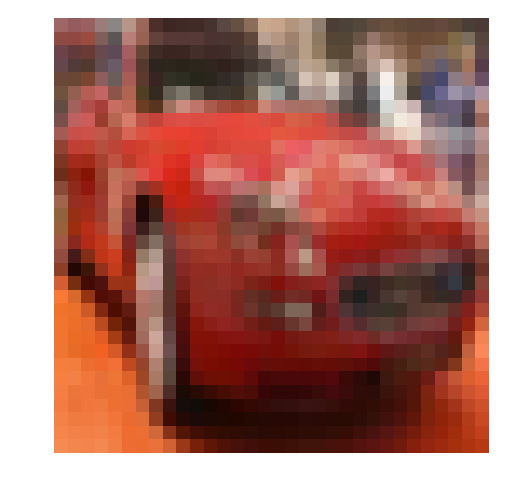

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x/255


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [5]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer().fit(range(10))

In [6]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    
    # TODO: Implement Function
    return lb.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [12]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,shape=(None,*image_shape),name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,shape=(None,n_classes),name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [67]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    weight_shape = [*conv_ksize,x_tensor.get_shape().as_list()[-1],conv_num_outputs]
    weight = tf.Variable(np.random.randn(*weight_shape)*np.sqrt(2/np.prod(weight_shape)),dtype=tf.float32)
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    conv_layer = tf.nn.conv2d(x_tensor,weight,strides=[1,*conv_strides,1],padding='SAME')
    conv_layer = tf.nn.bias_add(conv_layer,bias)
    conv_layer = tf.nn.relu(conv_layer)
    
    pool_layer = tf.nn.max_pool(conv_layer,[1,*pool_ksize,1],[1,*pool_strides,1],padding='VALID')
    
    return pool_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [49]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    s = x_tensor.shape
    return tf.reshape(x_tensor,[-1,s[1]*s[2]*s[3]])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [68]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    s = x_tensor.get_shape().as_list()
    weight_shape = [s[1],num_outputs]
    weight = tf.Variable(np.random.randn(*weight_shape)*np.sqrt(2/np.prod(weight_shape)),dtype=tf.float32)
    bias = tf.Variable(tf.zeros(num_outputs))
    fc_layer = tf.nn.relu(tf.nn.bias_add(tf.matmul(x_tensor,weight),bias))
    return fc_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [69]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    s = x_tensor.get_shape().as_list()
    weight_shape = [s[1],num_outputs]
    weight = tf.Variable(np.random.randn(*weight_shape)*np.sqrt(2/np.prod(weight_shape)),dtype=tf.float32)
    bias = tf.Variable(tf.zeros(num_outputs))
    o_layer = tf.nn.bias_add(tf.matmul(x_tensor,weight),bias)
    return o_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [81]:
def conv_net(x, keep_prob=1):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv = conv2d_maxpool(x_tensor=x,
                   conv_num_outputs=64, conv_ksize=[5,5],
                   conv_strides=[1,1], pool_ksize=[2,2],
                   pool_strides=[2,2])
    
    conv = conv2d_maxpool(x_tensor=conv,
                   conv_num_outputs=64, conv_ksize=[5,5],
                   conv_strides=[1,1], pool_ksize=[2,2],
                   pool_strides=[2,2])
    conv = tf.nn.dropout(conv,keep_prob)
    conv = conv2d_maxpool(x_tensor=conv,
                   conv_num_outputs=128, conv_ksize=[3,3],
                   conv_strides=[1,1], pool_ksize=[2,2],
                   pool_strides=[2,2])
    conv = tf.nn.dropout(conv,keep_prob)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flt = flatten(conv)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
#     flt = fully_conn(flt, 2056)
#     flt = tf.nn.dropout(flt,keep_prob)
    flt = fully_conn(flt, 512)
    flt = tf.nn.dropout(flt,keep_prob)
    flt = fully_conn(flt, 128)
    flt = tf.nn.dropout(flt,keep_prob)
    flt = fully_conn(flt, 32)
    flt = tf.nn.dropout(flt,keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    flt = output(flt, 10)
    
    # TODO: return output
    return flt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


In [18]:
valid_labels.shape[1]

10

## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [71]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function    
    session.run(optimizer,feed_dict={x:feature_batch,y:label_batch,keep_prob:keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [72]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    val_cost,val_accuracy = session.run([cost,accuracy],feed_dict = {x:valid_features,y:valid_labels,keep_prob:1})
    train_cost,train_accuracy = session.run([cost,accuracy],feed_dict = {x:feature_batch,y:label_batch,keep_prob:1})
    print(f'training cost = {train_cost}, training accuracy = {train_accuracy}')
    print(f'validation cost = {val_cost}, validation accuracy={val_accuracy}')
    print("=======================================")

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [84]:
# TODO: Tune Parameters
epochs = 80
batch_size = 512
keep_probability = 0.7

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [82]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  training cost = 2.3019859790802, training accuracy = 0.125
validation cost = 2.301701068878174, validation accuracy=0.1695999950170517
Epoch  2, CIFAR-10 Batch 1:  training cost = 2.2297186851501465, training accuracy = 0.1621621549129486
validation cost = 2.2251594066619873, validation accuracy=0.16279999911785126
Epoch  3, CIFAR-10 Batch 1:  training cost = 2.3027584552764893, training accuracy = 0.09459459781646729
validation cost = 2.3027596473693848, validation accuracy=0.10019999742507935
Epoch  4, CIFAR-10 Batch 1:  training cost = 2.2995240688323975, training accuracy = 0.16554054617881775
validation cost = 2.299168348312378, validation accuracy=0.17059999704360962
Epoch  5, CIFAR-10 Batch 1:  training cost = 2.25431489944458, training accuracy = 0.11824323982000351
validation cost = 2.2328133583068848, validation accuracy=0.14640000462532043
Epoch  6, CIFAR-10 Batch 1:  training cost = 2.1356163024902344, 

Epoch 38, CIFAR-10 Batch 1:  training cost = 1.341347336769104, training accuracy = 0.5540540814399719
validation cost = 1.4279148578643799, validation accuracy=0.4708000123500824
Epoch 39, CIFAR-10 Batch 1:  training cost = 1.3348654508590698, training accuracy = 0.5337837934494019
validation cost = 1.4125850200653076, validation accuracy=0.47940000891685486
Epoch 40, CIFAR-10 Batch 1:  training cost = 1.321675181388855, training accuracy = 0.537162184715271
validation cost = 1.4246376752853394, validation accuracy=0.4724000096321106
Epoch 41, CIFAR-10 Batch 1:  training cost = 1.2902560234069824, training accuracy = 0.5506756901741028
validation cost = 1.4028958082199097, validation accuracy=0.48260000348091125
Epoch 42, CIFAR-10 Batch 1:  training cost = 1.2776519060134888, training accuracy = 0.5743243098258972
validation cost = 1.4088672399520874, validation accuracy=0.48019999265670776
Epoch 43, CIFAR-10 Batch 1:  training cost = 1.2698543071746826, training accuracy = 0.56081080

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [85]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  training cost = 2.286466121673584, training accuracy = 0.10810811072587967
validation cost = 2.2850215435028076, validation accuracy=0.10540000349283218
Epoch  1, CIFAR-10 Batch 2:  training cost = 2.1854734420776367, training accuracy = 0.21621622145175934
validation cost = 2.189260482788086, validation accuracy=0.19760000705718994
Epoch  1, CIFAR-10 Batch 3:  training cost = 2.1051506996154785, training accuracy = 0.2060810774564743
validation cost = 2.1138126850128174, validation accuracy=0.2290000021457672
Epoch  1, CIFAR-10 Batch 4:  training cost = 2.0548014640808105, training accuracy = 0.22635135054588318
validation cost = 2.067422866821289, validation accuracy=0.23160000145435333
Epoch  1, CIFAR-10 Batch 5:  training cost = 1.9964444637298584, training accuracy = 0.27702704071998596
validation cost = 2.0038084983825684, validation accuracy=0.25760000944137573
Epoch  2, CIFAR-10 Batch 1:  training cost = 2.042978286743164, training accur

Epoch  8, CIFAR-10 Batch 3:  training cost = 1.115105152130127, training accuracy = 0.6182432174682617
validation cost = 1.3032687902450562, validation accuracy=0.5088000297546387
Epoch  8, CIFAR-10 Batch 4:  training cost = 1.1417299509048462, training accuracy = 0.5810810923576355
validation cost = 1.2706234455108643, validation accuracy=0.5242000222206116
Epoch  8, CIFAR-10 Batch 5:  training cost = 1.2061039209365845, training accuracy = 0.5743243098258972
validation cost = 1.2727892398834229, validation accuracy=0.5266000032424927
Epoch  9, CIFAR-10 Batch 1:  training cost = 1.2932716608047485, training accuracy = 0.5506756901741028
validation cost = 1.3414361476898193, validation accuracy=0.5063999891281128
Epoch  9, CIFAR-10 Batch 2:  training cost = 1.2117418050765991, training accuracy = 0.6013513803482056
validation cost = 1.2631802558898926, validation accuracy=0.5325999855995178
Epoch  9, CIFAR-10 Batch 3:  training cost = 1.0609484910964966, training accuracy = 0.604729712

Epoch 16, CIFAR-10 Batch 1:  training cost = 0.860683023929596, training accuracy = 0.6925675868988037
validation cost = 0.9899958968162537, validation accuracy=0.652400016784668
Epoch 16, CIFAR-10 Batch 2:  training cost = 0.9312820434570312, training accuracy = 0.6722972989082336
validation cost = 1.0464472770690918, validation accuracy=0.623199999332428
Epoch 16, CIFAR-10 Batch 3:  training cost = 0.7454593181610107, training accuracy = 0.7466216087341309
validation cost = 0.9977112412452698, validation accuracy=0.646399974822998
Epoch 16, CIFAR-10 Batch 4:  training cost = 0.7156849503517151, training accuracy = 0.75
validation cost = 0.997616708278656, validation accuracy=0.6462000012397766
Epoch 16, CIFAR-10 Batch 5:  training cost = 0.8444356918334961, training accuracy = 0.6790540814399719
validation cost = 1.0497496128082275, validation accuracy=0.623199999332428
Epoch 17, CIFAR-10 Batch 1:  training cost = 0.8444926738739014, training accuracy = 0.6959459185600281
validation 

Epoch 23, CIFAR-10 Batch 4:  training cost = 0.5016778707504272, training accuracy = 0.8479729890823364
validation cost = 0.8512894511222839, validation accuracy=0.7031999826431274
Epoch 23, CIFAR-10 Batch 5:  training cost = 0.5544092655181885, training accuracy = 0.8277027010917664
validation cost = 0.8445411324501038, validation accuracy=0.7085999846458435
Epoch 24, CIFAR-10 Batch 1:  training cost = 0.6328733563423157, training accuracy = 0.7668918967247009
validation cost = 0.8797569274902344, validation accuracy=0.6916000247001648
Epoch 24, CIFAR-10 Batch 2:  training cost = 0.6463394165039062, training accuracy = 0.7905405163764954
validation cost = 0.8659634590148926, validation accuracy=0.7027999758720398
Epoch 24, CIFAR-10 Batch 3:  training cost = 0.520121157169342, training accuracy = 0.8277027010917664
validation cost = 0.8330338001251221, validation accuracy=0.7113999724388123
Epoch 24, CIFAR-10 Batch 4:  training cost = 0.4838789403438568, training accuracy = 0.837837815

Epoch 31, CIFAR-10 Batch 2:  training cost = 0.41641777753829956, training accuracy = 0.875
validation cost = 0.7715590000152588, validation accuracy=0.741599977016449
Epoch 31, CIFAR-10 Batch 3:  training cost = 0.4081566631793976, training accuracy = 0.8716216087341309
validation cost = 0.7771860361099243, validation accuracy=0.7361999750137329
Epoch 31, CIFAR-10 Batch 4:  training cost = 0.3642655909061432, training accuracy = 0.8783783912658691
validation cost = 0.7478724718093872, validation accuracy=0.7504000067710876
Epoch 31, CIFAR-10 Batch 5:  training cost = 0.39255857467651367, training accuracy = 0.8817567825317383
validation cost = 0.7614843249320984, validation accuracy=0.7400000095367432
Epoch 32, CIFAR-10 Batch 1:  training cost = 0.41707471013069153, training accuracy = 0.8682432174682617
validation cost = 0.8236457109451294, validation accuracy=0.7257999777793884
Epoch 32, CIFAR-10 Batch 2:  training cost = 0.4022274911403656, training accuracy = 0.8783783912658691
va

Epoch 38, CIFAR-10 Batch 5:  training cost = 0.3184054493904114, training accuracy = 0.8986486196517944
validation cost = 0.7282775640487671, validation accuracy=0.7555999755859375
Epoch 39, CIFAR-10 Batch 1:  training cost = 0.3086114227771759, training accuracy = 0.8952702879905701
validation cost = 0.7362706661224365, validation accuracy=0.7573999762535095
Epoch 39, CIFAR-10 Batch 2:  training cost = 0.32051748037338257, training accuracy = 0.9054054021835327
validation cost = 0.7388924956321716, validation accuracy=0.7513999938964844
Epoch 39, CIFAR-10 Batch 3:  training cost = 0.3035552203655243, training accuracy = 0.912162184715271
validation cost = 0.760421633720398, validation accuracy=0.7512000203132629
Epoch 39, CIFAR-10 Batch 4:  training cost = 0.29414018988609314, training accuracy = 0.9256756901741028
validation cost = 0.7706413269042969, validation accuracy=0.7414000034332275
Epoch 39, CIFAR-10 Batch 5:  training cost = 0.3215431571006775, training accuracy = 0.89527028

Epoch 46, CIFAR-10 Batch 2:  training cost = 0.23990263044834137, training accuracy = 0.9527027010917664
validation cost = 0.7482489943504333, validation accuracy=0.7534000277519226
Epoch 46, CIFAR-10 Batch 3:  training cost = 0.24838390946388245, training accuracy = 0.9324324131011963
validation cost = 0.7227419018745422, validation accuracy=0.756600022315979
Epoch 46, CIFAR-10 Batch 4:  training cost = 0.20913317799568176, training accuracy = 0.9459459185600281
validation cost = 0.7320243716239929, validation accuracy=0.7580000162124634
Epoch 46, CIFAR-10 Batch 5:  training cost = 0.2733420729637146, training accuracy = 0.9189189076423645
validation cost = 0.73333740234375, validation accuracy=0.7572000026702881
Epoch 47, CIFAR-10 Batch 1:  training cost = 0.2487577497959137, training accuracy = 0.9290540814399719
validation cost = 0.7195130586624146, validation accuracy=0.7630000114440918
Epoch 47, CIFAR-10 Batch 2:  training cost = 0.21837887167930603, training accuracy = 0.9425675

Epoch 53, CIFAR-10 Batch 4:  training cost = 0.16447962820529938, training accuracy = 0.9527027010917664
validation cost = 0.7101329565048218, validation accuracy=0.7730000019073486
Epoch 53, CIFAR-10 Batch 5:  training cost = 0.20304450392723083, training accuracy = 0.9324324131011963
validation cost = 0.7200590372085571, validation accuracy=0.772599995136261
Epoch 54, CIFAR-10 Batch 1:  training cost = 0.1841096431016922, training accuracy = 0.9560810923576355
validation cost = 0.7278879880905151, validation accuracy=0.7692000269889832
Epoch 54, CIFAR-10 Batch 2:  training cost = 0.17883554100990295, training accuracy = 0.9493243098258972
validation cost = 0.7347254753112793, validation accuracy=0.7644000053405762
Epoch 54, CIFAR-10 Batch 3:  training cost = 0.16791315376758575, training accuracy = 0.9493243098258972
validation cost = 0.6903891563415527, validation accuracy=0.774399995803833
Epoch 54, CIFAR-10 Batch 4:  training cost = 0.17460882663726807, training accuracy = 0.94594

Epoch 61, CIFAR-10 Batch 1:  training cost = 0.1488776057958603, training accuracy = 0.9662162065505981
validation cost = 0.7135576605796814, validation accuracy=0.7760000228881836
Epoch 61, CIFAR-10 Batch 2:  training cost = 0.13104547560214996, training accuracy = 0.9662162065505981
validation cost = 0.725577712059021, validation accuracy=0.777400016784668
Epoch 61, CIFAR-10 Batch 3:  training cost = 0.15025733411312103, training accuracy = 0.9594594836235046
validation cost = 0.7154279351234436, validation accuracy=0.7757999897003174
Epoch 61, CIFAR-10 Batch 4:  training cost = 0.1284034252166748, training accuracy = 0.962837815284729
validation cost = 0.7001792788505554, validation accuracy=0.7825999855995178
Epoch 61, CIFAR-10 Batch 5:  training cost = 0.1682015359401703, training accuracy = 0.9459459185600281
validation cost = 0.7153133153915405, validation accuracy=0.772599995136261
Epoch 62, CIFAR-10 Batch 1:  training cost = 0.14851683378219604, training accuracy = 0.966216206

Epoch 68, CIFAR-10 Batch 3:  training cost = 0.13696901500225067, training accuracy = 0.962837815284729
validation cost = 0.7404900193214417, validation accuracy=0.7621999979019165
Epoch 68, CIFAR-10 Batch 4:  training cost = 0.10795720666646957, training accuracy = 0.9797297120094299
validation cost = 0.728430986404419, validation accuracy=0.77920001745224
Epoch 68, CIFAR-10 Batch 5:  training cost = 0.13946141302585602, training accuracy = 0.9594594836235046
validation cost = 0.7406728267669678, validation accuracy=0.7724000215530396
Epoch 69, CIFAR-10 Batch 1:  training cost = 0.1373635083436966, training accuracy = 0.962837815284729
validation cost = 0.7329112887382507, validation accuracy=0.7796000242233276
Epoch 69, CIFAR-10 Batch 2:  training cost = 0.10904476791620255, training accuracy = 0.9763513803482056
validation cost = 0.7226209044456482, validation accuracy=0.7778000235557556
Epoch 69, CIFAR-10 Batch 3:  training cost = 0.13461844623088837, training accuracy = 0.96959459

Epoch 75, CIFAR-10 Batch 5:  training cost = 0.12676215171813965, training accuracy = 0.9662162065505981
validation cost = 0.7350745797157288, validation accuracy=0.7793999910354614
Epoch 76, CIFAR-10 Batch 1:  training cost = 0.12990567088127136, training accuracy = 0.9695945978164673
validation cost = 0.7255399227142334, validation accuracy=0.7789999842643738
Epoch 76, CIFAR-10 Batch 2:  training cost = 0.08901803940534592, training accuracy = 0.9864864945411682
validation cost = 0.6970425844192505, validation accuracy=0.7888000011444092
Epoch 76, CIFAR-10 Batch 3:  training cost = 0.11357317864894867, training accuracy = 0.9695945978164673
validation cost = 0.7576830387115479, validation accuracy=0.777400016784668
Epoch 76, CIFAR-10 Batch 4:  training cost = 0.10132085531949997, training accuracy = 0.9763513803482056
validation cost = 0.7030068635940552, validation accuracy=0.7868000268936157
Epoch 76, CIFAR-10 Batch 5:  training cost = 0.11009912192821503, training accuracy = 0.969

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7709903478622436



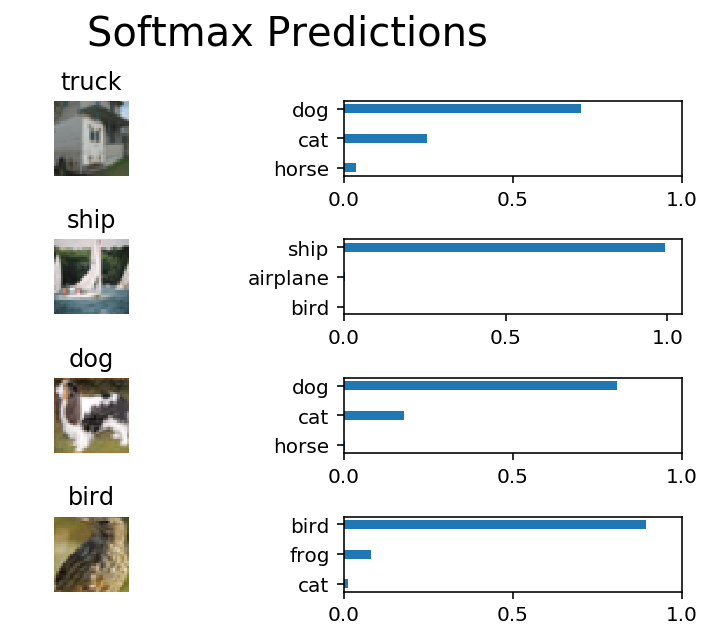

In [86]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.